# Imports

In [33]:
import torchaudio as tad
import matplotlib.pyplot as plt
import noisereduce as nr
import torch
import torchaudio.transforms as T

raw_audio_path = r"C:\Users\Admin\Documents\Mirage-Omega1\ml_models\ete-synthesis\processed_audios\mirage_1.wav"
processed_audio_path = r"C:\Users\Admin\Documents\Mirage-Omega1\ml_models\ete-synthesis\processed_audios\reducedTensor_Audio.wav"

# Raw Audio

In [30]:
raw_waveform, raw_sample_rate = tad.load(raw_audio_path, normalize=False, channels_first=True)

In [46]:
raw_waveform

tensor([[ 0.0000,  0.0000,  0.0000,  ..., -0.0045, -0.0060, -0.0078]])

In [ ]:
raw_waveform.t() # transpose, we can use permute and other things also

tensor([[ 0.0000],
        [ 0.0000],
        [ 0.0000],
        ...,
        [-0.0045],
        [-0.0060],
        [-0.0078]])

In [ ]:
raw_waveform.t().numpy() # convert into numpy values, in this there are [0.      ] values, their meaning is that, that these are not 0 values but contain very small values in it.

array([[ 0.        ],
       [ 0.        ],
       [ 0.        ],
       ...,
       [-0.00448608],
       [-0.00601196],
       [-0.0078125 ]], dtype=float32)

Text(0.5, 1.0, 'raw audio WaveForm')

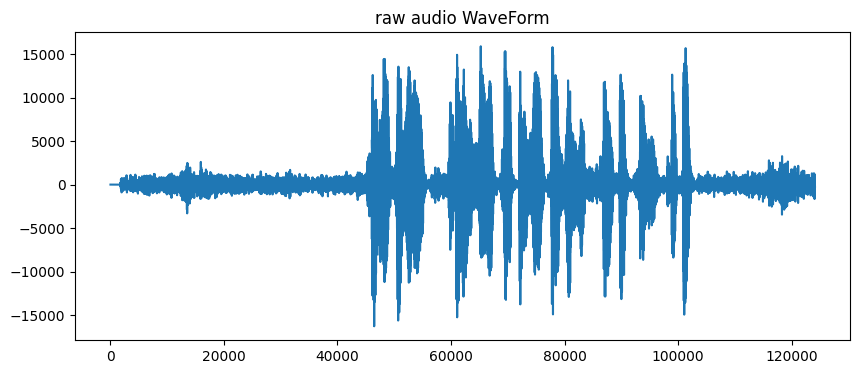

In [ ]:
# raw audio plotting
plt.figure(figsize=(10, 4))
plt.plot(raw_waveform.t().numpy())
plt.title("raw audio WaveForm")

In [50]:

# Spectrogram
spectrogram = T.Spectrogram()(raw_waveform)

In [ ]:
spectrogram # raw spectro

tensor([[[1.4041e-08, 1.0436e-09, 1.9451e-09,  ..., 3.0171e-06,
          3.1619e-04, 1.1838e-04],
         [1.9047e-10, 1.2155e-09, 1.0248e-09,  ..., 4.5029e-04,
          1.6330e-03, 9.4655e-03],
         [3.8297e-08, 1.3381e-09, 3.0677e-10,  ..., 5.1654e-02,
          3.2921e-02, 1.3204e-01],
         ...,
         [9.7737e-08, 7.9559e-09, 1.9249e-09,  ..., 2.4187e-05,
          3.2576e-05, 4.7092e-05],
         [6.4665e-08, 5.4644e-09, 1.2070e-09,  ..., 3.9630e-05,
          3.1473e-05, 9.5365e-05],
         [8.2888e-08, 4.8541e-09, 2.8667e-10,  ..., 2.2410e-05,
          1.2256e-07, 5.5047e-05]]])

In [ ]:
spectrogram.log2() #Spectrogram ko log scale pe convert kiya (kyunki amplitude usually exponential hota hai audio mein

tensor([[[-26.0858, -29.8358, -28.9375,  ..., -18.3384, -11.6269, -13.0443],
         [-32.2897, -29.6158, -29.8621,  ..., -11.1169,  -9.2582,  -6.7231],
         [-24.6382, -29.4772, -31.6021,  ...,  -4.2750,  -4.9248,  -2.9210],
         ...,
         [-23.2865, -26.9053, -28.9526,  ..., -15.3354, -14.9058, -14.3742],
         [-23.8824, -27.4473, -29.6260,  ..., -14.6230, -14.9555, -13.3562],
         [-23.5243, -27.6182, -31.6999,  ..., -15.4455, -22.9600, -14.1490]]])

In [ ]:
spectrogram.log2()[0,:,:] # [0,:,:] : Batch size ya channel ko select kiya (mono audio ke liye bas first index).

tensor([[-26.0858, -29.8358, -28.9375,  ..., -18.3384, -11.6269, -13.0443],
        [-32.2897, -29.6158, -29.8621,  ..., -11.1169,  -9.2582,  -6.7231],
        [-24.6382, -29.4772, -31.6021,  ...,  -4.2750,  -4.9248,  -2.9210],
        ...,
        [-23.2865, -26.9053, -28.9526,  ..., -15.3354, -14.9058, -14.3742],
        [-23.8824, -27.4473, -29.6260,  ..., -14.6230, -14.9555, -13.3562],
        [-23.5243, -27.6182, -31.6999,  ..., -15.4455, -22.9600, -14.1490]])

In [ ]:
spectrogram.log2()[0,:,:].detach() # .detach().numpy() : Tensor ko numpy array mein convert kiya visualization ke liye.

tensor([[-26.0858, -29.8358, -28.9375,  ..., -18.3384, -11.6269, -13.0443],
        [-32.2897, -29.6158, -29.8621,  ..., -11.1169,  -9.2582,  -6.7231],
        [-24.6382, -29.4772, -31.6021,  ...,  -4.2750,  -4.9248,  -2.9210],
        ...,
        [-23.2865, -26.9053, -28.9526,  ..., -15.3354, -14.9058, -14.3742],
        [-23.8824, -27.4473, -29.6260,  ..., -14.6230, -14.9555, -13.3562],
        [-23.5243, -27.6182, -31.6999,  ..., -15.4455, -22.9600, -14.1490]])

In [ ]:
spectrogram.log2()[0,:,:].detach().numpy() # .detach().numpy() : Tensor ko numpy array mein convert kiya visualization ke liye.

array([[-26.085762 , -29.835764 , -28.937473 , ..., -18.338385 ,
        -11.626924 , -13.0442505],
       [-32.289707 , -29.615812 , -29.862059 , ..., -11.116861 ,
         -9.258232 ,  -6.7231026],
       [-24.638199 , -29.477175 , -31.602139 , ...,  -4.2749877,
         -4.924849 ,  -2.920987 ],
       ...,
       [-23.286524 , -26.905321 , -28.952606 , ..., -15.335415 ,
        -14.905818 , -14.374157 ],
       [-23.882444 , -27.447296 , -29.625973 , ..., -14.623034 ,
        -14.955505 , -13.356186 ],
       [-23.524254 , -27.618155 , -31.699892 , ..., -15.445519 ,
        -22.960022 , -14.14897  ]], dtype=float32)

In [ ]:
color_maps = ['plasma', 'inferno', 'magma', 'cividis', 'coolwarm', 'viridis', 'seismic', 'cubehelix', 'twilight', 'gnuplot']
# Inferno, Plasma, Cividis, Magma, Viridis 
for cmap in color_maps:
    plt.figure(figsize=(10, 4))
    plt.imshow(spectrogram.log2()[0,:,:].detach().numpy(), cmap=cmap)
    plt.title(f"Spectrogram - {cmap}")
    plt.colorbar(format="%+2.0f dB")
    plt.show()


# Reduced Noice Audio

In [72]:
processed_waveform, processed_sample_rate = tad.load(raw_audio_path, channels_first=True)

In [73]:
processed_waveform

tensor([[ 0.0000,  0.0000,  0.0000,  ..., -0.0045, -0.0060, -0.0078]])

In [75]:
processed_waveform.t()

tensor([[ 0.0000],
        [ 0.0000],
        [ 0.0000],
        ...,
        [-0.0045],
        [-0.0060],
        [-0.0078]])

In [ ]:
processed_waveform.numpy()[0] # 1st index only for mono audio

array([ 0.        ,  0.        ,  0.        , ..., -0.00448608,
       -0.00601196, -0.0078125 ], dtype=float32)

Text(0.5, 1.0, 'reduecs Noice Audio waveForm')

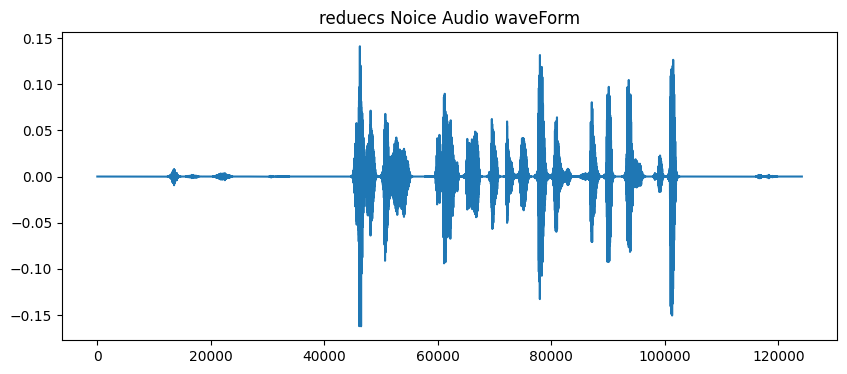

In [ ]:
# reducing noice to get better audio quality
reduced_noise = nr.reduce_noise(y=processed_waveform.numpy()[0], sr=processed_sample_rate)

# save reduced noice audio in folder... (change path before using)
reduced_tensor = torch.from_numpy(reduced_noise).unsqueeze(0)
output_path = r"C:\Users\Admin\Documents\Mirage-Omega1\ml_models\ete-synthesis\processed_audios\reducedTensor_Audio.wav"
tad.save(output_path,
        reduced_tensor,
        processed_sample_rate)

# ploting audio after reducing noice
plt.figure(figsize=(10, 4))
plt.plot(reduced_noise)
plt.title("reduecs Noice Audio waveForm")

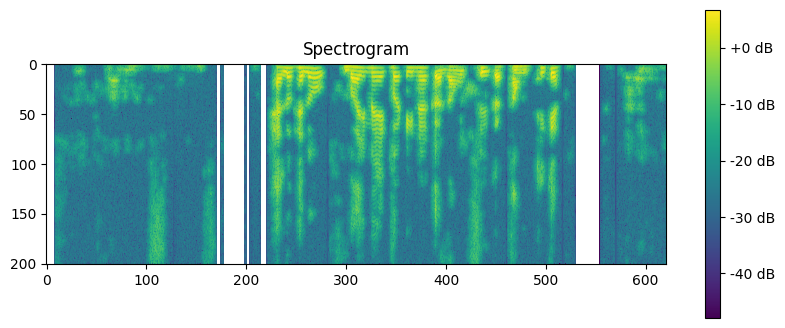

In [37]:
# Spectrogram
spectrogram = T.Spectrogram()(processed_waveform)

plt.figure(figsize=(10, 4))
plt.imshow(spectrogram.log2()[0,:,:].detach().numpy(), cmap='viridis')
plt.title("Spectrogram")
plt.colorbar(format="%+2.0f dB")
plt.show()

In [ ]:
# silence Removal
vad = T.Vad(sample_rate=processed_sample_rate)

# Apply VAD (remove silence)
waveform_vad = vad(processed_waveform)

# Save the processed audio
tad.save("reducedTensr_Audio_silence_removal.wav", waveform_vad, processed_sample_rate)


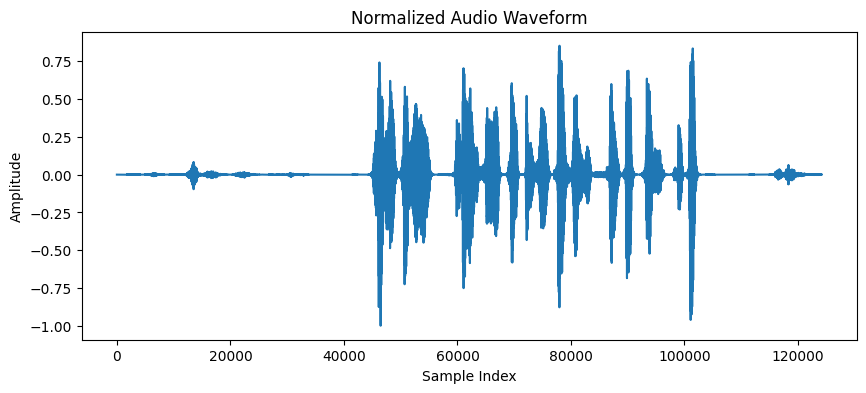

In [44]:
# normalizing audio
# Normalize to -1 to 1 range
max_val = processed_waveform.abs().max()
normalized_processed_waveform = processed_waveform / max_val

# saving audio
tad.save("reducedTensr_Audio_silence_removal_Normalized.wav", normalized_processed_waveform, processed_sample_rate)

# Visualize normalized waveform
plt.figure(figsize=(10, 4))
plt.plot(normalized_processed_waveform.t().numpy())
plt.title('Normalized Audio Waveform')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.show()
